# Random Forest

#### 배깅(Bagging)이란?
배깅(Bagging)은 Bootstrap Aggregating의 약자로, 보팅(Voting)과는 달리 동일한 알고리즘으로 여러 분류기를 만들어 보팅으로 최종 결정하는 알고리즘

- 배깅은 다음과 같은 방식으로 진행

(1) 동일한 알고리즘을 사용하는 일정 수의 분류기 생성  
(2) 각각의 분류기는 부트스트래핑(Bootstrapping)방식으로 생성된 샘플데이터를 학습  
(3) 최종적으로 모든 분류기가 보팅을 통해 예측 결정

※ 부트스트래핑 샘플링은 전체 데이터에서 일부 데이터의 중첩을 허용하는 방식

![008-1](https://user-images.githubusercontent.com/63298243/118589541-86aae680-b7db-11eb-800b-ae99c18140fa.png)

![008-2](https://user-images.githubusercontent.com/63298243/118589545-8874aa00-b7db-11eb-9bb1-04f37f7f8f56.png)

#### 랜덤 포레스트는 여러 개의 결정트리(Decision Tree)를 활용한 배깅 방식의 대표적인 알고리즘

+ 장점
    - 결정 트리의 쉽고 직관적인 장점을 그대로 가지고 있음
    - 앙상블 알고리즘 중 비교적 빠른 수행 속도를 가지고 있음
    - 다양한 분야에서 좋은 성능을 나타냄
    
+ 단점
    - 하이퍼 파라미터가 많아 튜닝을 위힌 시간이 많이 소요됨

## 오늘 해결할 문제

- 와인 품질 예측

와인 품질 예측을 random forest 모델을 이용하여 해결해봅시다 :)

- fixed acidity : 고정 산도

- volatile acidity : 휘발성 산도

- citric acid : 시트르산

- residual sugar : 잔류 설탕

- chlorides : 염화물

- free sulfur dioxide : 자유 이산화황

- total sulfur dioxide : 총 이산화황

- density : 밀도

- pH : pH

- sulphates : 황산염

- alcohol : 알코올

- quality : 품질   # 종속변수

## Import library & data

In [1]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

## EDA

이번 전처리는 자유입니다.

상관관계 분석도 해보고

이제껏 배운것 활용해보시길~!

In [20]:
#데이터셋 구경
#데이터 인포
#결측치 확인
df.head()
df.info()
df.isna().sum()
df['quality'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


array([5, 6, 7, 4, 8, 3], dtype=int64)

<AxesSubplot: >

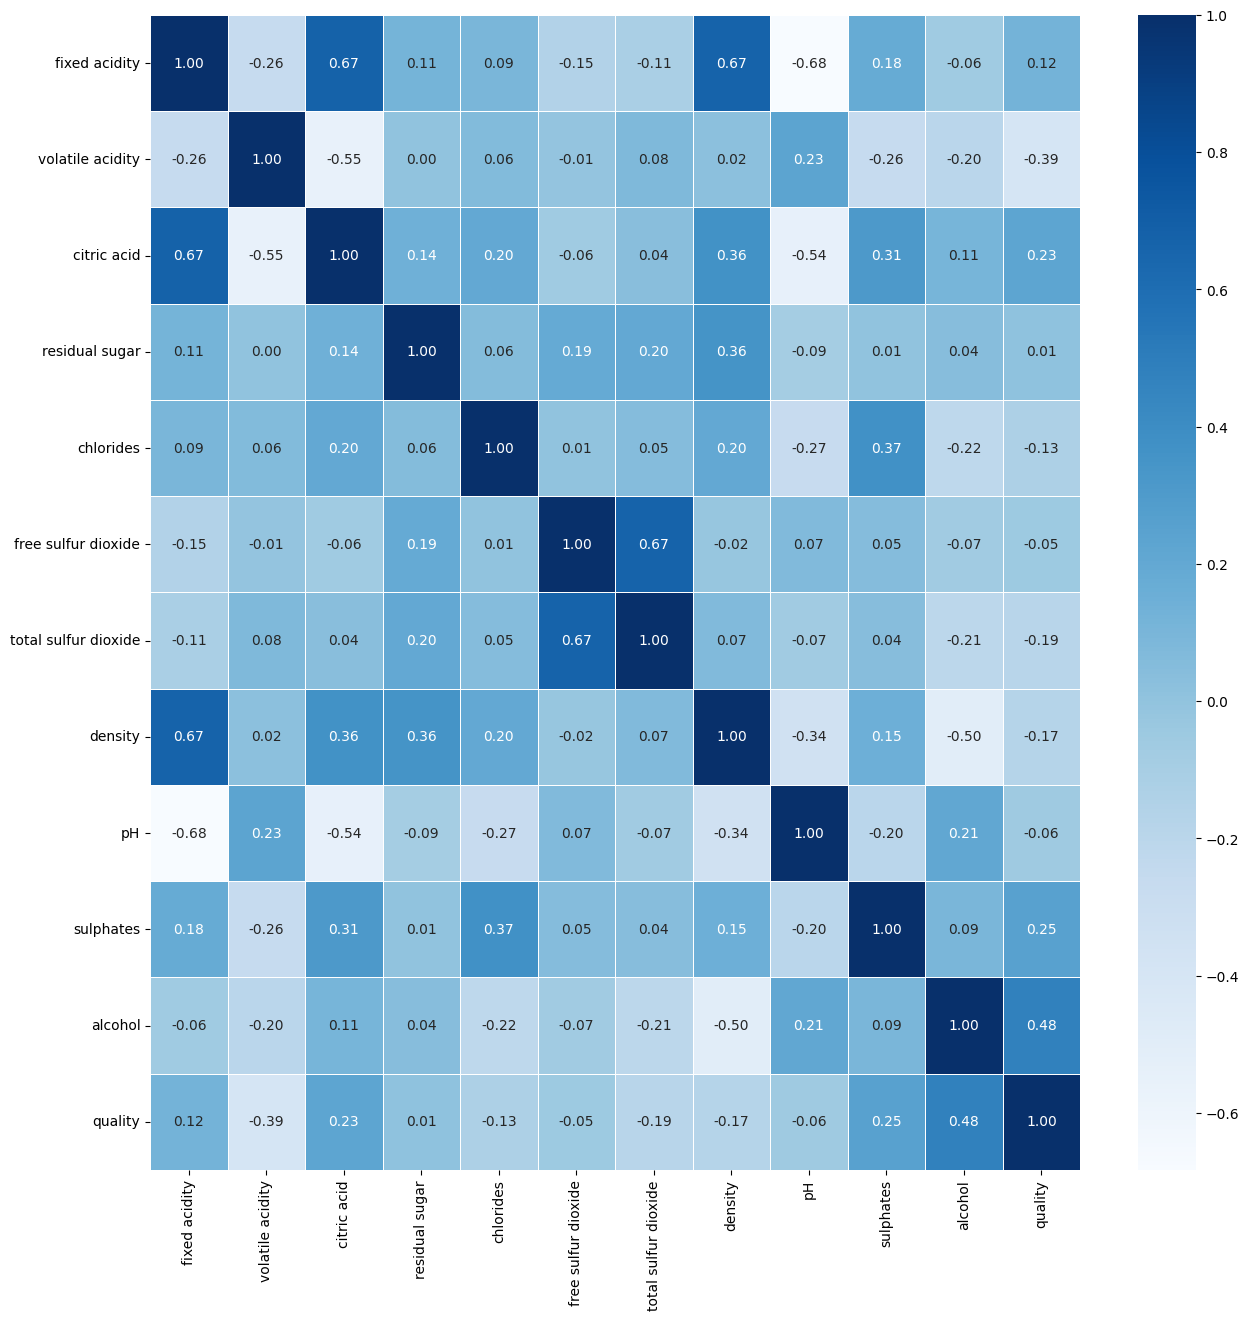

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15,15))
sns.heatmap(data = df.corr(), annot= True, fmt= '.2f', linewidths = .5, cmap="Blues")

## Modeling

Random Forest 모델의 파라미터
    - random_state = 1
    - max_depth = 1

사용예시

RandomForestClassifier(random_state=1, max_depth = 1)

In [13]:
y = df['quality']
X = df.drop(['quality','residual sugar', 'free sulfur dioxide', 'pH'], axis = 1)

In [14]:
X = preprocessing.StandardScaler().fit(X).transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3,random_state =10)

In [16]:
rf = RandomForestClassifier(random_state=10, max_depth=25)

In [17]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, random_state=10)

In [19]:
r_square = rf.score(X_test, y_test)
print(r_square*100,"%",sep=" ")

66.04166666666667 %
